# Linear SVM

## read library and data

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline #パイプライン
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.svm import LinearSVC # Support vector classification

iris = datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)
"""
0 sepal lengthガクの長さ
1 sepal widthガクの幅
2 petal length花弁の長さ
3 petal width花弁の幅
"""

'\n0 sepal lengthガクの長さ\n1 sepal widthガクの幅\n2 petal length花弁の長さ\n3 petal width花弁の幅\n'

ハードマージン分類 : マージン違反を許さない分類方法.  
ソフトマージン分類 : マージン違反を許す分類方法,Cパラメータでマージン違反を管理する.  
Cパラメータが大きい→マージン違反(道の中や反対側に入ること)は減るがマージンが狭くなる.  
Cパラメータが小さい→マージン違反が増えるがマージンの幅が広がる.

In [3]:
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
svm_clf.predict([[5.5,1.7]])

array([1.])

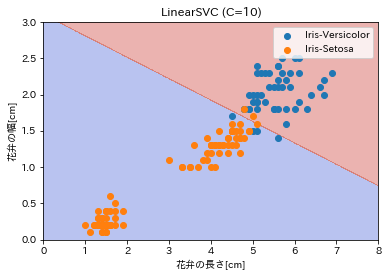

In [5]:
from matplotlib import pyplot as plt
x_temp1 = np.linspace(0,8,1000)
x_temp2 = np.linspace(0,3,1000)
x_test,y_test = np.meshgrid(x_temp1,x_temp2)
z=svm_clf.predict(np.c_[x_test.ravel(),y_test.ravel()])
z=z.reshape(x_test.shape) 
plt.figure(facecolor="white")
plt.contourf(x_test,y_test,z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:,0][y==1],X[:,1][y==1],label="Iris-Versicolor")
plt.scatter(X[:,0][y==0],X[:,1][y==0],label="Iris-Setosa")
plt.xlabel("花弁の長さ[cm]")
plt.ylabel("花弁の幅[cm]")
plt.title("LinearSVC (C=10)")
plt.legend()
plt.show()

# Non linear SVM
## read data

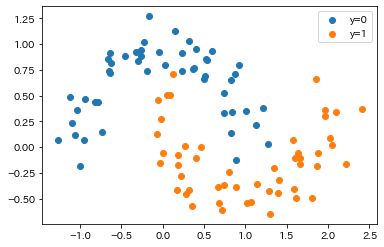

In [8]:
from sklearn.datasets import make_moons 
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.figure(facecolor="white")
plt.scatter(X[:,0][y==0],X[:,1][y==0],label="y=0")
plt.scatter(X[:,0][y==1],X[:,1][y==1],label="y=1")
plt.legend()
plt.show()

## Polynomial kernel

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

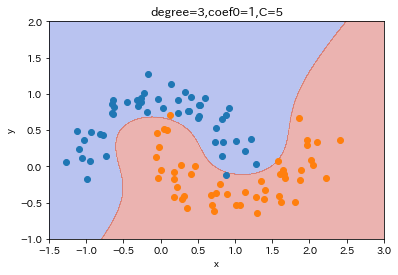

In [11]:
x_temp1 = np.linspace(-1.5,3,1000)
x_temp2 = np.linspace(-1,2,1000)
x_test,y_test = np.meshgrid(x_temp1,x_temp2)
z=poly_kernel_svm_clf.predict(np.c_[x_test.ravel(),y_test.ravel()])
z=z.reshape(x_test.shape)  
plt.figure(facecolor="white")
plt.contourf(x_test,y_test,z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("degree=3,coef0=1,C=5")
plt.show()

## RBF kernel

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

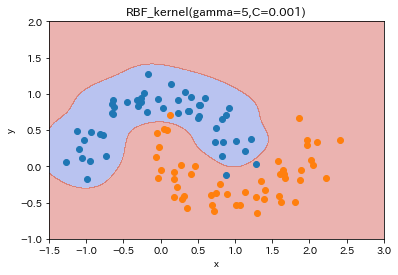

In [13]:
x_temp1 = np.linspace(-1.5,3,1000)
x_temp2 = np.linspace(-1,2,1000)
x_test,y_test = np.meshgrid(x_temp1,x_temp2)
z=rbf_kernel_svm_clf.predict(np.c_[x_test.ravel(),y_test.ravel()])
z=z.reshape(x_test.shape)  
plt.figure(facecolor="white")
plt.contourf(x_test,y_test,z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("RBF_kernel(gamma=5,C=0.001)")
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel_svm_clf1 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=0.1,C=0.001))
])

rbf_kernel_svm_clf2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=0.1,C=1000))
])

rbf_kernel_svm_clf3 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])

rbf_kernel_svm_clf4 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=1000))
])

rbf_kernel_svm_clf1.fit(X,y)
rbf_kernel_svm_clf2.fit(X,y)
rbf_kernel_svm_clf3.fit(X,y)
rbf_kernel_svm_clf4.fit(X,y)

x_temp1 = np.linspace(-1.5,3,1000)
x_temp2 = np.linspace(-1,2,1000)
x_test,y_test = np.meshgrid(x_temp1,x_temp2)
z1=rbf_kernel_svm_clf1.predict(np.c_[x_test.ravel(),y_test.ravel()])
z2=rbf_kernel_svm_clf2.predict(np.c_[x_test.ravel(),y_test.ravel()])
z3=rbf_kernel_svm_clf3.predict(np.c_[x_test.ravel(),y_test.ravel()])
z4=rbf_kernel_svm_clf4.predict(np.c_[x_test.ravel(),y_test.ravel()])

z1=z1.reshape(x_test.shape)
z2=z2.reshape(x_test.shape)  
z3=z3.reshape(x_test.shape)  
z4=z4.reshape(x_test.shape)

C:\Users\yudai\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


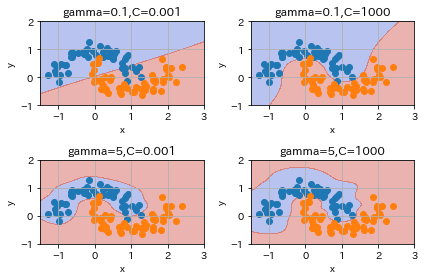

In [15]:
fig = plt.figure(facecolor="white")

# top left
ax1 = fig.add_subplot(2, 2, 1)
ax1.contourf(x_test,y_test,z1,cmap=plt.cm.coolwarm, alpha=0.4)
ax1.grid()
ax1.scatter(X[:,0][y==0],X[:,1][y==0])
ax1.scatter(X[:,0][y==1],X[:,1][y==1])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("gamma=0.1,C=0.001")

# top right
ax2 = fig.add_subplot(2, 2, 2)
ax2.contourf(x_test,y_test,z2,cmap=plt.cm.coolwarm, alpha=0.4)
ax2.grid()
ax2.scatter(X[:,0][y==0],X[:,1][y==0])
ax2.scatter(X[:,0][y==1],X[:,1][y==1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("gamma=0.1,C=1000")

# bottom left
ax3 = fig.add_subplot(2, 2, 3)
ax3.contourf(x_test,y_test,z3,cmap=plt.cm.coolwarm, alpha=0.4)
ax3.grid()
ax3.scatter(X[:,0][y==0],X[:,1][y==0])
ax3.scatter(X[:,0][y==1],X[:,1][y==1])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("gamma=5,C=0.001")

# bottom right
ax4 = fig.add_subplot(2, 2, 4)
ax4.contourf(x_test,y_test,z4,cmap=plt.cm.coolwarm, alpha=0.4)
ax4.grid()
ax4.scatter(X[:,0][y==0],X[:,1][y==0])
ax4.scatter(X[:,0][y==1],X[:,1][y==1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("gamma=5,C=1000")

# show plots
fig.tight_layout()
fig.savefig("rbf_4pic.jpg")
fig.show()

# SVR

In [16]:
import numpy as np
m=500
X=1.2*np.random.rand(m,1)-3
y=3*X+6+np.random.randn(m,1)/3

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [18]:
from sklearn.svm import LinearSVR
svr_reg = LinearSVR(epsilon=0.7).fit(X_train,y_train)
svr_reg.score(X_test,y_test)

C:\Users\yudai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8458465442897696

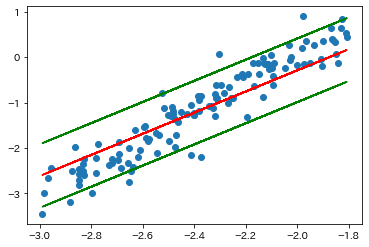

In [19]:
from matplotlib import pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,svr_reg.predict(X_test),c="r")
plt.plot(X_test,svr_reg.predict(X_test)+0.7,c="g")
plt.plot(X_test,svr_reg.predict(X_test)-0.7,c="g")
plt.show()

In [20]:
def trans_matrix(X,n):
    m=X.shape[0]
    X_trans = np.zeros((m,n))
    X_trans[:,0]=X.T
    for i in range(n-1):
        X_trans[:,i+1]=X_trans[:,i]*X_trans[:,0]
    return X_trans

m=500
degree=2
X=5*np.random.rand(m,1)-5.5
y=0.5*X**2+3*X+2+np.random.randn(m,1)/5

X_train,X_test,y_train,y_test=train_test_split(X,y)

X_train_trans=trans_matrix(X_train,degree)
X_test_trans=trans_matrix(X_test,degree)

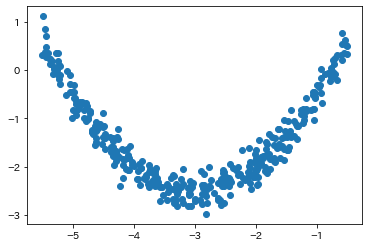

In [21]:
plt.scatter(X_train,y_train)
plt.show()

In [22]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1).fit(X_train_trans,y_train)
svm_poly_reg.score(X_test_trans,y_test)

C:\Users\yudai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yudai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6639693130768919

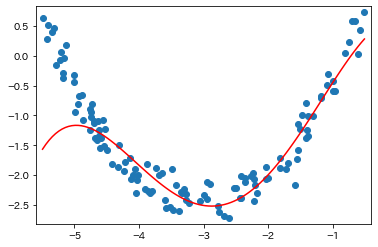

In [23]:
X=np.linspace(min(X_test),max(X_test),100)
X_trans = trans_matrix(X,2)
plt.scatter(X_test,y_test)
plt.plot(X,svm_poly_reg.predict(X_trans),c="r")
plt.ylim(min(y_test)-0.1,max(y_test)+0.1)
plt.xlim(min(X_test)-0.1,max(X_test)+0.1)
plt.show()